## 0. Importando Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime
import itertools
from itertools import permutations
from multiprocessing.pool import Pool
import os

c:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from importlib.metadata import version
version('pandas')

'2.0.1'

In [13]:
pip install pandas==2.0.1

  Using cached pandas-2.0.1-cp38-cp38-win_amd64.whl (10.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: phik 0.12.0 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'C:\\Users\\Samsung\\anaconda3\\Lib\\site-packages\\~.ndas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



## 1. Definindo cenários

### 1.1. Define 3 matrizes para problema

#### Matriz Extra Simples

In [3]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

#### Matriz Simples

In [4]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

#### Matriz Média

In [5]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.9, 0.9]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.9, 0.9]

matrix_medium = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8])

#### Matriz Complexa

In [6]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

### 1.2. Plota Matrizes

## 2. Define Classes de Estado e Agente

In [ ]:
# global variables
'''MATRIX_GAME = matrix_simple
START = (0, 0)
DETERMINISTIC = True'''

In [7]:
matrix=matrix_extra_simple
unique_combinations=list(itertools.product(np.arange(0, matrix.shape[0], 1), np.arange(0, matrix.shape[1], 1)))
unique_combinations

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2)]

In [8]:
actions = ["up", "down", "left", "right"]
rtable = pd.DataFrame(np.zeros((matrix.shape[1]*matrix.shape[0], len(actions))),
                            index=unique_combinations, columns=actions)

In [9]:
rtable.columns

Index(['up', 'down', 'left', 'right'], dtype='object')

In [10]:
position=(0,0)
matrix[position[0]+1, position[1]]

0.0

In [40]:
rtable.index

Index([(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2),
       (3, 0), (3, 1), (3, 2)],
      dtype='object')

In [39]:
for position in rtable.index:
    print((position))

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)


In [37]:
type(rtable.index.to_list()[0][0])

numpy.int32

In [43]:
rtable.loc[[(0, 0)], 'down']

(0, 0)    0.0
Name: down, dtype: float64

In [12]:
    # Enriquece tabela r com recompensas imediatas pre definidas:
for position in rtable.index.to_list():
    #up
    if position[0]!=0: #Se movimento for valido
        rtable.loc[position, 'up'] = matrix[position[0]-1, position[1]]
    #down
    if position[0]<matrix.shape[0]-1: #Se movimento for valido
        print(position)
        rtable.loc[position, 'down'] = matrix[position[0]+1, position[1]]
    #right
    if position[1]<matrix.shape[1]-1: #Se movimento for valido
        rtable.loc[position, 'right'] = matrix[position[0], position[1]+1]
    #left
    if position[1]!=0: #Se movimento for valido
        rtable.loc[position, 'left'] = matrix[position[0], position[1]-1]

IndentationError: expected an indented block (3111936747.py, line 4)

steps:  69
game  0  ended in:
1.1475672721862793
steps:  27
game  1  ended in:
0.3209991455078125
steps:  27
game  2  ended in:
0.3169989585876465
steps:  178
game  3  ended in:
2.0960209369659424
steps:  52
game  4  ended in:
0.7669985294342041
steps:  33
game  5  ended in:
0.4850046634674072
steps:  52
game  6  ended in:
0.7700257301330566
steps:  29
game  7  ended in:
0.3260023593902588
steps:  23
game  8  ended in:
0.3510017395019531
steps:  64
game  9  ended in:
0.7740015983581543
None


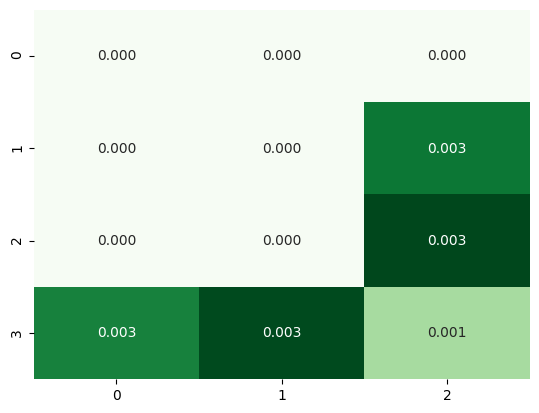

In [45]:
import warnings
warnings.filterwarnings('ignore')

class State:
    # Inicializa estado do jogo
    def __init__(self, state, matrix_game):

        # Matriz inicial de recompensas:
        self.ini_reward_matrix = matrix_game

        # Cria tabuleiro zerado com quantidade de colunas e linhas determinado
        self.board = np.zeros([self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1]])

        # Define locais com obstaculos
        i=0
        while i<= self.ini_reward_matrix.shape[0]-1:
            j=0
            while j <= self.ini_reward_matrix.shape[1]-1:
                if self.ini_reward_matrix[i, j]==-100:
                    self.board[i, j]=-100
                j+=1
            i+=1

        # Define o estado do jogo atual. Inicialmente é igual ao parâmetro START
        self.state = state

        # Define variável de termino do jogo como False
        self.isEnd = False

    # Caso perca ou ganhe o jogo, atualiza o estado para fim
    def isEndFunc(self, count):
        if count == 0:
            self.isEnd = True

    # Verifica posição na matriz com base na ação
    def nxtPosition(self, action):
        """
        action: up, down, left, right

        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if action == "up":
            nxtState = (self.state[0] - 1, self.state[1])
        elif action == "down":
            nxtState = (self.state[0] + 1, self.state[1])
        elif action == "left":
            nxtState = (self.state[0], self.state[1] - 1)
        else:
            nxtState = (self.state[0], self.state[1] + 1)

        # Se estado é legal, próximo estado, caso contrário, permanece no mesmo
        if (nxtState[0] >= 0) and (nxtState[0] <= (self.ini_reward_matrix.shape[0] -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (self.ini_reward_matrix.shape[1] -1)):
                if self.board[nxtState]!= -100:
                    return nxtState
        return self.state

    # Mostra tabuleiro
    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, self.ini_reward_matrix.shape[0]):
            print('-----------------')
            out = '| '
            for j in range(0, self.ini_reward_matrix.shape[1]):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -100:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                if self.ini_reward_matrix[i,j]>0:
                    token = 't'
                out += token + ' | '
            print(out)
        print('-----------------')
    # Mostra tabuleiro
    def showMatrix(self):
        sns.heatmap(self.ini_reward_matrix, vmin=-1, vmax=1, annot=True)
        

# Agent of player

class Agent:

    def __init__(self, matrix_game, start, lr, gamma, d_f, exp_rate, max_exp_rate, min_exp_rate, decay_rate, max_steps):
        
        # Define iníco do jogo
        self.start=start

        # Matriz inicial com recompensas pré definidas:
        self.ini_reward_matrix = matrix_game

        # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

        # Inicializa vetor de estados
        self.states = [self.start]

        # Recompensa Total
        self.total_reward = 0

        # Inicializa vetor de ações
        self.actions = ["up", "down", "left", "right"]

        # Inicializa classe estado
        self.State = State(state=self.start, matrix_game=matrix_game)

        # Define lr e exp_rate
        self.lr = lr # Learning Rate: Grau de atualização de peso para estado/ação atual
        self.gamma = gamma # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
        self.d_f = d_f # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos

        # Exploration parameters
        self.exp_rate = exp_rate # Exploration rate
        self.max_exp_rate = max_exp_rate # Exploration probability at start
        self.min_exp_rate = min_exp_rate # Minimum exploration probability 
        self.decay_rate = decay_rate # Exponential decay rate for exploration prob
        self.max_steps = max_steps # Qtd de passos até jogo ser finalizado

        # Inicializa tabela Q
            # Cria listas para cada item da coluna e da linha e combina cada item em tuplas:
        unique_combinations=list(itertools.product(np.arange(0, self.ini_reward_matrix.shape[0], 1), np.arange(0, self.ini_reward_matrix.shape[1], 1)))
            # Cria tabela q zerada:
        self.qtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))),
                                    index=unique_combinations, columns=self.actions)

        #Inicializa tabela R
            # Cria tabela de recompensas imediatas zerada:
        self.rtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))),
                                    index=unique_combinations, columns=self.actions)
            # Enriquece tabela r com recompensas imediatas pre definidas:
        for position in self.rtable.index:
            #up
            if position[0]!=0: #Se movimento for valido
                self.rtable.loc[[position], 'up'] = self.ini_reward_matrix[position[0]-1, position[1]]
            #down
            if position[0]<self.ini_reward_matrix.shape[0]-1: #Se movimento for valido
                self.rtable.loc[[position], 'down'] = self.ini_reward_matrix[position[0]+1, position[1]]
            #right
            if position[1]<self.ini_reward_matrix.shape[1]-1: #Se movimento for valido
                self.rtable.loc[[position], 'right'] = self.ini_reward_matrix[position[0], position[1]+1]
            #left
            if position[1]!=0: #Se movimento for valido
                self.rtable.loc[[position], 'left'] = self.ini_reward_matrix[position[0], position[1]-1]

        # Cria tabela de função de valor zerada:
        self.vtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1])))

        # Vetor com recompensas. Inicializa com recompensa referente ao início do jogo
        self.rewards = [float(self.ini_reward_matrix[self.start])]

        # Listas em que serão armazenadas principais informações, para posteriormente criar arquivo csv
        self.game_list = []
        self.time_steps_list = []
        self.time_list = []
        self.states_list = []
        self.total_rewards_list = []
        self.rewards_list = []
        self.vtable_list = []
        self.qtable_list = []
        self.state_reward_list = []
        self.exp_rate_lst = []

        # Inicializa tempo
        self.t1=time.time()

        # Seta parametro inicial de fim de jogo para False
        self.isEnd = False

    # Escolhe uma ação
    def chooseAction(self):
        
        # Definindo uma semente aleatória
        np.random.seed((os.getpid() * int(time.time_ns() // 1_000_000)) % 123456789)
        # Inicializa variáveis
        mx_nxt_reward = 0
        action = ""

        # Se valor aleatório for menor que taxa de exp_rate escolhida, escolhe ação aleatória
        if np.random.uniform(0, 1) <= self.exp_rate:
            # Escolhe ação aleatória
            action = np.random.choice(self.actions)

        # Caso contrário, escolhe ação de acordo com estado com maior valor
        else:
            # Seleciona ação que maximiza tabela Q
            # Greedy action
            mx_nxt_reward=0
            for a in self.actions:
                # verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward

        # Caso tenham duas ou mais ações empatadas com maior valor, escolhe uma aleatoriamente
            equal_actions=[]
            for a in self.actions:
                # Verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward == mx_nxt_reward:
                    equal_actions.append(a)

            action = np.random.choice(equal_actions)
        return action

    # Realiza ação
    def takeAction(self, action):
        # Altera posição atual com base na ação tomada
        position = self.State.nxtPosition(action)

        # Retorna a posição atual, depois de realizar ação
        return State(state=position, matrix_game=self.ini_reward_matrix)
    
    def isEndFunc(self, steps):
        # Caso estado atual seja maior que 0 e ainda não tenha sido percorrido, reduz contador em 1
        if (self.State.state not in self.states[:-1]) and (self.ini_reward_matrix[self.State.state]>0):
            self.count-=1

        # Se contador é igual a zero, jogo termina
        if self.count == 0:
            self.isEnd = True

        # Se quantidade de passos chegar a 0, jogo termina
        if steps==self.max_steps:
            self.isEnd = True
    # Update Q table
    def updateQtable(self, action):
        # Caso já tenha passado por esse estado previamente, considera recompensa como zero
        if self.State.nxtPosition(action) in (self.states):
            r=0
        else:
            # Realiza update na tabela Q usando recompensa descontada pela quantidade de passos realizados
            r = float(self.rtable.loc[[self.State.state]][action])*(self.d_f**(len(self.states)-1))

        # Realiza update no vetor de recompensas
        self.rewards.append(r)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        self.qtable.at[self.State.state, action] = self.qtable.loc[[self.State.state]][action]+ \
                                            self.lr * (r + self.gamma * np.max(self.qtable.loc[[self.State.nxtPosition(action)]].values) - \
                                                self.qtable.loc[[self.State.state]][action])

    def calculateValuefunc(self):
        # Cria tabela com função de valor zerada
        self.vtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1])))

        # Enriquece tabela de função de valor com valores máximos da tabela q
        for row in self.qtable.index:
            self.vtable.at[row[0], row[1]] = np.max(self.qtable.loc[[row]].values)
        return self.vtable
    
    # Reinicia o jogo
    def reset(self):
        # Reinicia listas de estados percorridos e recompesas 
        self.states = [self.start]
        self.rewards = [float(self.ini_reward_matrix[self.start])]
        self.state_reward_dict=[]
        self.total_reward = 0
        #Reinicia classe de estado
        self.State = State(state=self.start, matrix_game=self.ini_reward_matrix)
        # Reinicia contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]
        # Reinicia tempo de cada jogo
        self.t1 = time.time()

        self.isEnd = False

    # Salva informações de cada jogo em listas
    def save_info(self, i, time):

        # Armazena número do jogo em lista
        self.game_list.append(i)

        # Armazena quantidade de passos percorridos em lista
        self.time_steps_list.append(len(self.states))

        # Armazena tempo total de cada jogo em lista
        self.time_list.append(time)

        # Armazena lista de estados percorridos em lista
        self.states_list.append(self.states)

        # Armazena recompensa total do jogo em lista
        self.total_rewards_list.append(np.sum(self.rewards))

        # Armazena recompensas de cada estado em lista
        self.rewards_list.append(self.rewards)

        # Armazena vtable em lista 
        self.vtable_list.append(self.calculateValuefunc().to_dict('dict'))

        # Armazena tabela Q em lista
        self.qtable_list.append(self.qtable.to_dict('dict'))

        # Armazena cada par de estado/recompensa em lista de listas
        self.state_reward_dict = list(zip(self.states, self.rewards))
        self.state_reward_list.append(self.state_reward_dict)

        # Armazena exp_rate atual
        self.exp_rate_lst.append(self.exp_rate)

    def generate_result_file(self, rounds, steps):

        # Cria dataframe e armazena listas com info de cada jogo em colunas
        arquivo_final = pd.DataFrame()
        arquivo_final['JOGO'] = self.game_list
        arquivo_final['TIMESTEPS'] = self.time_steps_list
        arquivo_final['TIME'] = self.time_list
        arquivo_final['STATES'] = self.states_list
        arquivo_final['REWARDS'] = self.rewards_list
        arquivo_final['STATES_REWARDS'] = self.state_reward_list      
        arquivo_final['TOTAL REWARDS'] = self.total_rewards_list
        arquivo_final['Vtable'] = self.vtable_list
        arquivo_final['Qtable'] = self.qtable_list
        arquivo_final['exp_rate'] = self.exp_rate_lst

        # date_time atual
        date_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

        # Cria arquivo com parametros do problema
        arquivo_parametros = pd.DataFrame(data={
                                            'parameter name': ['lr',
                                                                'gamma',
                                                                'd_f',
                                                                'exp_rate',
                                                                'max_exp_rate',
                                                                'min_exp_rate',
                                                                'decay_rate',
                                                                'dimensions',
                                                                'date',
                                                                'rounds',
                                                                'steps'],
                                            'parameter': [self.lr,
                                                            self.gamma,
                                                            self.d_f,
                                                            self.exp_rate,
                                                            self.max_exp_rate,
                                                            self.min_exp_rate,
                                                            self.decay_rate,
                                                            str(self.ini_reward_matrix.shape[0])+' x '+str(self.ini_reward_matrix.shape[1]),
                                                            date_time,
                                                            rounds,
                                                            steps]
})

        # Exporta resultado para arquivo csv
        with pd.ExcelWriter(f'Resultado_RL_Q_Learning/results_q_learn_dim_{self.ini_reward_matrix.shape[0]}x{self.ini_reward_matrix.shape[1]}_{date_time}.xlsx') as writer:  
            arquivo_final.to_excel(writer, sheet_name='results')
            arquivo_parametros.to_excel(writer, sheet_name='parameters')
        #arquivo_final.to_excel(f'Resultado_RL_Q_Learning/results_q_learn_dim_{self.ini_reward_matrix.shape[0]}x{self.ini_reward_matrix.shape[1]}_{date_time}.xlsx', sheet_name='results')

    def play(self, rounds=10):
        # Inicializa contador de jogos
        i = 0
    
        # Joga n partidas
        while i < rounds:
            
            if self.isEnd==False:

                # Escolhe uma ação
                action = self.chooseAction()

                #Update na tabela Q
                self.updateQtable(action)

                # appenda no vetor de estados
                self.states.append(self.State.nxtPosition(action))

                # Realiza a ação, atualiza o estado
                self.State = self.takeAction(action)

                # Define quantidade de passos como tamanho do vetor estado
                steps=len(self.states)

                # Reduz contador caso estado atual>0. Caso contador=0, jogo termina
                self.isEndFunc(steps)

            if self.isEnd==True:
                #print('exp_rate: ',self.exp_rate)
                #print('total reward: ', np.sum(self.rewards))
                print('steps: ', len(self.states))
                # Reduce epsilon (because we need less and less exploration)
                self.exp_rate = self.min_exp_rate + (self.max_exp_rate - self.min_exp_rate)*np.exp(-self.decay_rate*i)

                # Finaliza tempo de duração do jogo
                duracao_jogo = (time.time()-self.t1)

                # Printa tempo
                print('game ' ,i, ' ended in:')
                print(duracao_jogo)

                # Salva informações em listas
                self.save_info(i=i, time=duracao_jogo)

                # Reseta jogo atual e segue para próximo jogo
                self.reset()
                i += 1
        
        # Gera Arquivo com Resultados
        self.generate_result_file(rounds, steps)

    # Mostra resultados em formato de heatmap
    def showValues(self):
        sns.heatmap(self.calculateValuefunc(), annot=True, fmt=".3f", cbar=False, cmap=sns.color_palette("Greens", n_colors=100))
        #print(self.calculateValuefunc())

if __name__ == "__main__":
    ag = Agent(matrix_game=matrix_extra_simple, # Ambiente(Matriz) a ser percorrida
                start=(0, 0), # Ponto de início do jogo
                lr=0.001, # Learning Rate: Grau de atualização de peso para estado/ação atual
                gamma=0.99, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                d_f=0.99, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                exp_rate=1, # Exploration rate
                max_exp_rate=1, # Exploration probability at start
                min_exp_rate=0.01, # Minimum exploration probability 
                decay_rate=0.001, # Exponential decay rate for exploration prob
                max_steps=5000 # Qtd de passos até jogo ser finalizado
                )

    ag.play(rounds=10)
    print(ag.showValues())

In [ ]:
if __name__ == "__main__":
    ag = Agent(matrix_game=matrix_medium, # Ambiente(Matriz) a ser percorrida
                start=(0, 0), # Ponto de início do jogo
                lr=0.001, # Learning Rate: Grau de atualização de peso para estado/ação atual
                gamma=0.9999, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                d_f=0.95, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                exp_rate=1, # Exploration rate
                max_exp_rate=1, # Exploration probability at start
                min_exp_rate=0.01, # Minimum exploration probability 
                decay_rate=0.005, # Exponential decay rate for exploration prob
                max_steps=5000 # Qtd de passos até jogo ser finalizado
                )

    ag.play(rounds=10)
    print(ag.showValues())

## 3. Analisando variáveis d_f e decay rate

### 3.1. Analisando potenciais d_f ideal para cada cenário 

Para cada cenário, podemos ter um d_f ideal, visto na quantidade media de passos ate conclusao do jogo em cada cenário

## 4. Rodando Grid Search para obtenção de melhores resultados

### 4.1. Avaliando Cenário - Matrix Extra Simple (4x3)

#### 4.1.1. Avaliando Melhor d_f para problema- Matrix Extra Simple (4x3)

In [ ]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_extra_simple_d_f(arg): 
    matrix_list = [matrix_extra_simple] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.01] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.99] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability 
    decay_rate_list = [0.001] # [0.001, 0.005] Exponential decay rate for exploration prob
    max_steps_list = [5000] # Qtd de passos até jogo ser finalizado
    rounds_list = [8000] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

In [ ]:
if __name__ == '__main__':
    # create and configure the process pool
    with Pool() as pool:
        # execute tasks in order
       pool.map(grid_matrix_extra_simple_d_f, range(10))

#### 4.1.2. Avaliando Melhores hiperparâmetros - Matrix Extra Simple (4x3)

Avaliação dos melhores hiperparâmetros dentre:

* lr (learning rate) = [0.1, 0.01, 0.001]
* gamma_list = [0.99, 0.95]
* decay_rate_list = [0.001, 0.0005]

In [ ]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_extra_simple_param(arg): 
    matrix_list = [matrix_extra_simple] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.1, 0.01, 0.001] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.99, 0.95] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.95] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability 
    decay_rate_list = [0.001, 0.0005] # [0.001, 0.005] Exponential decay rate for exploration prob
    max_steps_list = [5000] # Qtd de passos até jogo ser finalizado
    rounds_list = [8000] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

In [ ]:
if __name__ == '__main__':
    # create and configure the process pool
    with Pool() as pool:
        # execute tasks in order
       pool.map(grid_matrix_extra_simple_param, range(10))

### 4.2. Avaliando Cenário - Matrix Simple (5x5)

#### 4.2.1. Avaliando Melhor d_f para problema - Matrix Simple (5x5)

In [ ]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_simple_d_f(arg): 
    matrix_list = [matrix_simple] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.01] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.99] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.8] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability 
    decay_rate_list = [0.001] # [0.001, 0.005] Exponential decay rate for exploration prob
    max_steps_list = [10000] # Qtd de passos até jogo ser finalizado
    rounds_list = [8000] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

In [ ]:
if __name__ == '__main__':
    # create and configure the process pool
    with Pool() as pool:
        # execute tasks in order
       pool.map(grid_matrix_simple_d_f, range(10))

#### 4.1.2. Avaliando Melhores hiperparâmetros - Matrix Simple (5x5)

Avaliação dos melhores hiperparâmetros dentre:

* lr (learning rate) = [0.1, 0.01, 0.001]
* gamma_list = [0.99, 0.95]
* decay_rate_list = [0.001, 0.0005]

In [ ]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_simple_param(arg): 
    matrix_list = [matrix_simple] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.001] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.99, 0.95] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.8] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability 
    decay_rate_list = [0.001, 0.0005] # [0.001, 0.005] Exponential decay rate for exploration prob
    max_steps_list = [10000] # Qtd de passos até jogo ser finalizado
    rounds_list = [8000] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

In [ ]:
if __name__ == '__main__':
    # create and configure the process pool
    with Pool() as pool:
        # execute tasks in order
       pool.map(grid_matrix_simple_param, range(10))

### 4.4. Avaliando Cenário - Matrix Complex (9x13)

#### 4.4.1. Avaliando Melhor d_f para problema - Matrix Complex (9x13)

In [ ]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_complex_d_f(arg): 
    matrix_list = [matrix_complex] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.01] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.99] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.99, 0.999,0.9999] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability
    decay_rate_list = [0.001] # [0.001, 0.005] Exponential decay rate for exploration prob
    max_steps_list = [10000] # Qtd de passos até jogo ser finalizado
    rounds_list = [8000] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

In [ ]:
if __name__ == '__main__':
    # create and configure the process pool
    with Pool() as pool:
        # execute tasks in order
       pool.map(grid_matrix_complex_d_f, range(10))

### 4.3. Avaliando Cenário - Matrix Medium (8x8)

#### 4.3.1. Avaliando Melhor d_f para problema - Matrix Medium (8x8)

In [ ]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_medium_d_f(arg): 
    matrix_list = [matrix_medium] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.01] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.99] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.99, 0.999, 0.9999] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability 
    decay_rate_list = [0.001] # [0.001, 0.005] Exponential decay rate for exploration prob
    max_steps_list = [10000] # Qtd de passos até jogo ser finalizado
    rounds_list = [8000] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

In [ ]:
if __name__ == '__main__':
    # create and configure the process pool
    with Pool() as pool:
        # execute tasks in order
       pool.map(grid_matrix_medium_d_f, range(10))

#### 4.3.2. Avaliando Melhores hiperparâmetros - Matrix Medium (8x8)

Avaliação dos melhores hiperparâmetros dentre:

* lr (learning rate) = [0.01, 0.001]
* gamma_list = [0.99, 0.95]
* decay_rate_list = [0.001, 0.0005]

In [ ]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_medium_param(arg): 
    matrix_list = [matrix_medium] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.01] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.99, 0.97] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.99] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability 
    decay_rate_list = [0.001, 0.0005] # [0.001, 0.005] Exponential decay rate for exploration prob
    max_steps_list = [10000] # Qtd de passos até jogo ser finalizado
    rounds_list = [8000] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

In [ ]:
if __name__ == '__main__':
    # create and configure the process pool
    with Pool() as pool:
        # execute tasks in order
       pool.map(grid_matrix_medium_param, range(10))

#### 4.4.2. Avaliando Melhores hiperparâmetros - Matrix Complex (9x13)

Avaliando resultado com mesmos hiperparâmetros finais de matrix 8x8:

* lr (learning rate) = [0.001]
* gamma_list = [0.99]
* decay_rate_list = [0.0005]
* d_f = [0.99]

In [ ]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_complex_param(arg):
    matrix_list = [matrix_complex] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.001] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.97] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.99] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability 
    decay_rate_list = [0.0005] # [0.001, 0.005] Exponential decay rate for exploration prob
    max_steps_list = [10000] # Qtd de passos até jogo ser finalizado
    rounds_list = [8000] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

In [ ]:
if __name__ == '__main__':
    # create and configure the process pool
    with Pool() as pool:
        # execute tasks in order
       pool.map(grid_matrix_complex_param, range(10))

Treinamento Restante

In [47]:
# Iterando por combinações dos parâmetros 20x
def grid_matrix_extra_simple_complementar(arg):
    matrix_list = [matrix_extra_simple] # Ambiente(Matriz) a ser percorrida
    lr_list = [0.01] # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
    gamma_list = [0.99] # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
    d_f_list = [0.8] # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
    exp_rate_list = [1] # Exploration rate
    min_exp_rate_list = [0.01] # Minimum exploration probability 
    decay_rate_list = [0.001] # [0.001, 0.0005] Exponential decay rate for exploration prob
    max_steps_list = [5000] # Qtd de passos até jogo ser finalizado
    rounds_list = [20] # Qtd de jogos

    for matrix in matrix_list:
        for lr in lr_list:
            for gamma in gamma_list:
                for d_f in d_f_list:
                    for exp_rate in exp_rate_list:
                        for min_exp_rate in min_exp_rate_list:
                            for decay_rate in decay_rate_list:
                                for max_steps in max_steps_list:
                                    for rounds in rounds_list:
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            ag.play(rounds=rounds)
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{arg}")
                                            print(ag.showValues())

steps:  118
game  0  ended in:
0.9159984588623047
steps:  27
game  1  ended in:
0.41900062561035156
steps:  44
game  2  ended in:
0.44899725914001465
steps:  102
game  3  ended in:
0.8130018711090088
steps:  22
game  4  ended in:
0.12199926376342773
steps:  79
game  5  ended in:
0.7640013694763184
steps:  62
game  6  ended in:
0.42899513244628906
steps:  54
game  7  ended in:
0.4669969081878662
steps:  21
game  8  ended in:
0.18999910354614258
steps:  87
game  9  ended in:
0.9219982624053955
steps:  61
game  10  ended in:
0.5229973793029785
steps:  37
game  11  ended in:
0.2889988422393799
steps:  32
game  12  ended in:
0.20599889755249023
steps:  55
game  13  ended in:
0.40000176429748535
steps:  22
game  14  ended in:
0.10401630401611328
steps:  64
game  15  ended in:
0.4959981441497803
steps:  60
game  16  ended in:
0.348003625869751
steps:  50
game  17  ended in:
0.1820056438446045
steps:  17
game  18  ended in:
0.10899734497070312
steps:  45
game  19  ended in:
0.3249967098236084


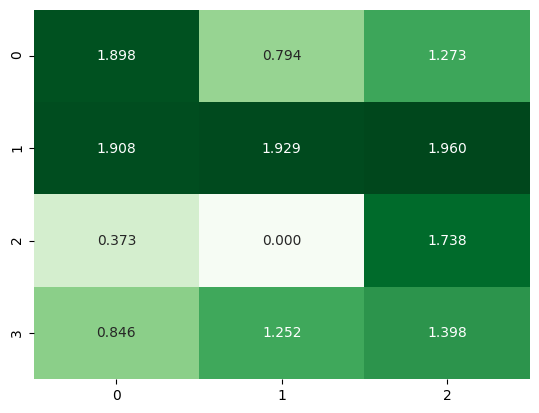

In [48]:
matrix = matrix_extra_simple # Ambiente(Matriz) a ser percorrida
lr = 0.01 # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
gamma = 0.99 # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
d_f = 0.8 # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
exp_rate = 1 # Exploration rate
min_exp_rate = 0.01 # Minimum exploration probability 
decay_rate = 0.001 # [0.001, 0.0005] Exponential decay rate for exploration prob
max_steps = 5000 # Qtd de passos até jogo ser finalizado
rounds = 8000 # Qtd de jogos

ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
            start=(0, 0), # Ponto de início do jogo
            lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
            gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
            d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
            exp_rate=exp_rate, # Exploration rate
            max_exp_rate=exp_rate, # Exploration probability at start
            min_exp_rate=min_exp_rate, # Minimum exploration probability 
            decay_rate=decay_rate, # Exponential decay rate for exploration prob
            max_steps=max_steps # Qtd de passos até jogo ser finalizado
            )
ag.play(rounds=rounds)
print(ag.showValues())

steps:  206
game  0  ended in:
2.160085678100586
steps:  31
game  1  ended in:
0.1550002098083496
steps:  83
game  2  ended in:
0.44962143898010254
steps:  122
game  3  ended in:
0.5899984836578369
steps:  22
game  4  ended in:
0.09400773048400879
steps:  48
game  5  ended in:
0.2519989013671875
steps:  202
game  6  ended in:
1.047609567642212
steps:  13
game  7  ended in:
0.06899833679199219
steps:  200
game  8  ended in:
1.2146053314208984
steps:  91
game  9  ended in:
0.6629998683929443
steps:  40
game  10  ended in:
0.16700291633605957
steps:  45
game  11  ended in:
0.2610001564025879
steps:  60
game  12  ended in:
0.3000030517578125
steps:  43
game  13  ended in:
0.20299792289733887
steps:  68
game  14  ended in:
0.38698363304138184
steps:  85
game  15  ended in:
0.4140012264251709
steps:  114
game  16  ended in:
0.4919877052307129
steps:  187
game  17  ended in:
0.7970027923583984
steps:  35
game  18  ended in:
0.18199968338012695
steps:  24
game  19  ended in:
0.1399967670440673

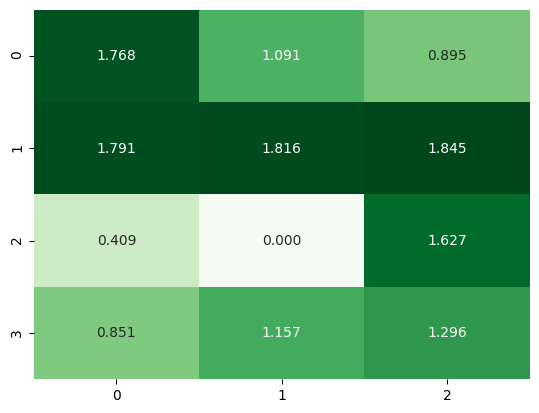

In [49]:
matrix = matrix_extra_simple # Ambiente(Matriz) a ser percorrida
lr = 0.01 # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
gamma = 0.99 # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
d_f = 0.8 # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
exp_rate = 1 # Exploration rate
min_exp_rate = 0.01 # Minimum exploration probability 
decay_rate = 0.001 # [0.001, 0.0005] Exponential decay rate for exploration prob
max_steps = 5000 # Qtd de passos até jogo ser finalizado
rounds = 8000 # Qtd de jogos

ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
            start=(0, 0), # Ponto de início do jogo
            lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
            gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
            d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
            exp_rate=exp_rate, # Exploration rate
            max_exp_rate=exp_rate, # Exploration probability at start
            min_exp_rate=min_exp_rate, # Minimum exploration probability 
            decay_rate=decay_rate, # Exponential decay rate for exploration prob
            max_steps=max_steps # Qtd de passos até jogo ser finalizado
            )
ag.play(rounds=rounds)
print(ag.showValues())

steps:  44
game  0  ended in:
4.835003137588501
steps:  60
game  1  ended in:
0.30099964141845703
steps:  51
game  2  ended in:
0.24199724197387695
steps:  297
game  3  ended in:
1.688999891281128
steps:  24
game  4  ended in:
0.10599851608276367
steps:  61
game  5  ended in:
1.1009955406188965
steps:  46
game  6  ended in:
0.17099452018737793
steps:  52
game  7  ended in:
0.38500165939331055
steps:  52
game  8  ended in:
0.3340029716491699
steps:  58
game  9  ended in:
0.39899444580078125
steps:  17
game  10  ended in:
0.08600282669067383
steps:  24
game  11  ended in:
0.09799456596374512
steps:  51
game  12  ended in:
0.23601245880126953
steps:  171
game  13  ended in:
0.6599998474121094
steps:  157
game  14  ended in:
0.6300075054168701
steps:  25
game  15  ended in:
0.09100723266601562
steps:  36
game  16  ended in:
0.13399720191955566
steps:  113
game  17  ended in:
0.5059990882873535
steps:  214
game  18  ended in:
0.9269974231719971
steps:  13
game  19  ended in:
0.0790009498596

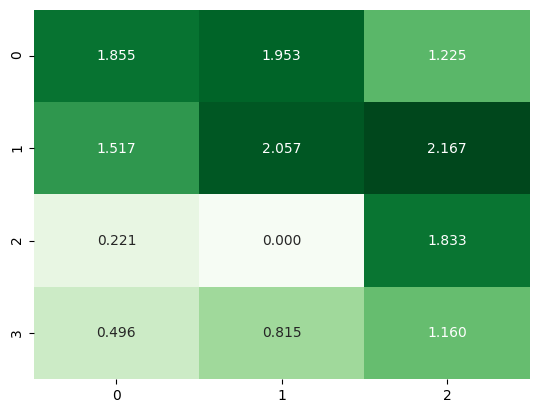

In [50]:
matrix = matrix_extra_simple # Ambiente(Matriz) a ser percorrida
lr = 0.01 # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
gamma = 0.95 # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
d_f = 0.95 # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
exp_rate = 1 # Exploration rate
min_exp_rate = 0.01 # Minimum exploration probability 
decay_rate = 0.001 # [0.001, 0.0005] Exponential decay rate for exploration prob
max_steps = 5000 # Qtd de passos até jogo ser finalizado
rounds = 8000 # Qtd de jogos

ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
            start=(0, 0), # Ponto de início do jogo
            lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
            gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
            d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
            exp_rate=exp_rate, # Exploration rate
            max_exp_rate=exp_rate, # Exploration probability at start
            min_exp_rate=min_exp_rate, # Minimum exploration probability 
            decay_rate=decay_rate, # Exponential decay rate for exploration prob
            max_steps=max_steps # Qtd de passos até jogo ser finalizado
            )
ag.play(rounds=rounds)
print(ag.showValues())

steps:  652
game  0  ended in:
3.7687153816223145
steps:  463
game  1  ended in:
2.4010040760040283
steps:  482
game  2  ended in:
2.267003059387207
steps:  744
game  3  ended in:
3.437995195388794
steps:  936
game  4  ended in:
3.862043857574463
steps:  589
game  5  ended in:
2.0933146476745605
steps:  405
game  6  ended in:
1.3589675426483154
steps:  325
game  7  ended in:
1.3929970264434814
steps:  825
game  8  ended in:
3.3779959678649902
steps:  447
game  9  ended in:
1.5890016555786133
steps:  905
game  10  ended in:
3.489001512527466
steps:  518
game  11  ended in:
1.809000015258789
steps:  953
game  12  ended in:
4.386005163192749
steps:  397
game  13  ended in:
1.4539949893951416
steps:  638
game  14  ended in:
2.78702712059021
steps:  1596
game  15  ended in:
6.112020015716553
steps:  1642
game  16  ended in:
7.131159067153931
steps:  661
game  17  ended in:
3.529994487762451
steps:  215
game  18  ended in:
1.800002098083496
steps:  344
game  19  ended in:
1.6299989223480225


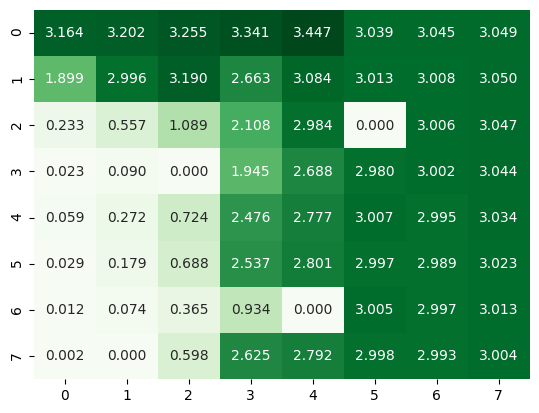

In [51]:
matrix = matrix_medium # Ambiente(Matriz) a ser percorrida
lr = 0.01 # [0.01, 0.001, 0.0001] Learning Rate: Grau de atualização de peso para estado/ação atual
gamma = 0.99 # [0.95, 0.99] Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
d_f = 0.9999 # [0.8, 0.9, 0.95, 0.99, 0.999, 0.9999] d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
exp_rate = 1 # Exploration rate
min_exp_rate = 0.01 # Minimum exploration probability 
decay_rate = 0.001 # [0.001, 0.0005] Exponential decay rate for exploration prob
max_steps = 5000 # Qtd de passos até jogo ser finalizado
rounds = 8000 # Qtd de jogos

ag = Agent(matrix_game=matrix, # Ambiente(Matriz) a ser percorrida
            start=(0, 0), # Ponto de início do jogo
            lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
            gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
            d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
            exp_rate=exp_rate, # Exploration rate
            max_exp_rate=exp_rate, # Exploration probability at start
            min_exp_rate=min_exp_rate, # Minimum exploration probability 
            decay_rate=decay_rate, # Exponential decay rate for exploration prob
            max_steps=max_steps # Qtd de passos até jogo ser finalizado
            )
ag.play(rounds=rounds)
print(ag.showValues())